In [1]:
import smooth_component_analysis as sca
from importlib import reload
reload(sca)
import numpy as np
import pandas as pd
import get_db_data as gdd

from scipy.stats import zscore


In [2]:
import seaborn as sns

In [3]:
sago = sca.savitzky_golay([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013],21,11,2,3)

In [4]:
df = sago.get_aligned_signal_componets()

x range: 4.0 224.5


In [5]:
df.columns = pd.MultiIndex.from_tuples(df.columns)
df.columns

MultiIndex([(1001,   'Raw_101'),
            (1001,    'Sg_101'),
            (1001, 'resid_101'),
            (1001,   'rms_101'),
            (1001,  'rmso_101'),
            (1001,   'Raw_102'),
            (1001,    'Sg_102'),
            (1001, 'resid_102'),
            (1001,   'rms_102'),
            (1001,  'rmso_102'),
            ...
            (1013,   'Raw_138'),
            (1013,    'Sg_138'),
            (1013, 'resid_138'),
            (1013,   'rms_138'),
            (1013,  'rmso_138'),
            (1013,   'Raw_139'),
            (1013,    'Sg_139'),
            (1013, 'resid_139'),
            (1013,   'rms_139'),
            (1013,  'rmso_139')],
           length=150)

In [47]:
cdf.loc[(1001,   'Raw_101'),(1001,   'Raw_101')]

1.0

In [6]:
cdf = df.corr()

In [50]:

def yield_rmso_crossgroup_corr(same_group=False, col_type="rmso_",yield_with_colnames = False):
    cols = [c for c in cdf.columns if c[1].startswith(col_type)]
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if (cols[i][0] == cols[j][0])==same_group: # different groups
                print(cols[i], cols[j])
                if yield_with_colnames:
                    yield ((cols[i], cols[j]), cdf.loc[cols[i],cols[j]])
                else:
                    yield cdf.loc[cols[i],cols[j]]

In [51]:
rm_cg = list(yield_rmso_crossgroup_corr())

(1001, 'rmso_101') (1004, 'rmso_110')
(1001, 'rmso_101') (1004, 'rmso_111')
(1001, 'rmso_101') (1004, 'rmso_112')
(1001, 'rmso_101') (1006, 'rmso_116')
(1001, 'rmso_101') (1006, 'rmso_117')
(1001, 'rmso_101') (1006, 'rmso_118')
(1001, 'rmso_101') (1007, 'rmso_119')
(1001, 'rmso_101') (1007, 'rmso_120')
(1001, 'rmso_101') (1007, 'rmso_121')
(1001, 'rmso_101') (1008, 'rmso_122')
(1001, 'rmso_101') (1008, 'rmso_123')
(1001, 'rmso_101') (1008, 'rmso_124')
(1001, 'rmso_101') (1009, 'rmso_125')
(1001, 'rmso_101') (1009, 'rmso_126')
(1001, 'rmso_101') (1009, 'rmso_127')
(1001, 'rmso_101') (1010, 'rmso_128')
(1001, 'rmso_101') (1010, 'rmso_129')
(1001, 'rmso_101') (1010, 'rmso_130')
(1001, 'rmso_101') (1011, 'rmso_131')
(1001, 'rmso_101') (1011, 'rmso_132')
(1001, 'rmso_101') (1011, 'rmso_133')
(1001, 'rmso_101') (1012, 'rmso_134')
(1001, 'rmso_101') (1012, 'rmso_135')
(1001, 'rmso_101') (1012, 'rmso_136')
(1001, 'rmso_101') (1013, 'rmso_137')
(1001, 'rmso_101') (1013, 'rmso_138')
(1001, 'rmso

In [52]:
rm_same = list(yield_rmso_crossgroup_corr(True))

(1001, 'rmso_101') (1001, 'rmso_102')
(1001, 'rmso_101') (1001, 'rmso_103')
(1001, 'rmso_102') (1001, 'rmso_103')
(1004, 'rmso_110') (1004, 'rmso_111')
(1004, 'rmso_110') (1004, 'rmso_112')
(1004, 'rmso_111') (1004, 'rmso_112')
(1006, 'rmso_116') (1006, 'rmso_117')
(1006, 'rmso_116') (1006, 'rmso_118')
(1006, 'rmso_117') (1006, 'rmso_118')
(1007, 'rmso_119') (1007, 'rmso_120')
(1007, 'rmso_119') (1007, 'rmso_121')
(1007, 'rmso_120') (1007, 'rmso_121')
(1008, 'rmso_122') (1008, 'rmso_123')
(1008, 'rmso_122') (1008, 'rmso_124')
(1008, 'rmso_123') (1008, 'rmso_124')
(1009, 'rmso_125') (1009, 'rmso_126')
(1009, 'rmso_125') (1009, 'rmso_127')
(1009, 'rmso_126') (1009, 'rmso_127')
(1010, 'rmso_128') (1010, 'rmso_129')
(1010, 'rmso_128') (1010, 'rmso_130')
(1010, 'rmso_129') (1010, 'rmso_130')
(1011, 'rmso_131') (1011, 'rmso_132')
(1011, 'rmso_131') (1011, 'rmso_133')
(1011, 'rmso_132') (1011, 'rmso_133')
(1012, 'rmso_134') (1012, 'rmso_135')
(1012, 'rmso_134') (1012, 'rmso_136')
(1012, 'rmso

RMS-O cross-group corr: 0.010 ± 0.16
RMS-O within-group corr:
      0.127 ± 0.22


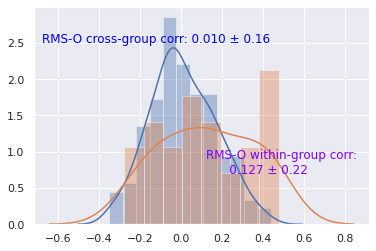

In [124]:
sns.distplot(rm_cg, bins=12)
sns.distplot(rm_same,bins=8)
stats = lambda v: (np.array(v).mean(), np.array(v).std())
str1 = "RMS-O cross-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(rm_cg)) 
str2 = "RMS-O within-group corr:\n      {:.3f} \u00b1 {:.2f}".format(*stats(rm_same))
plt.text(-0.68,2.5, str1,color=(0,0,1))
plt.text(0.12,0.7, str2,color=(0.5,0,1))
print(str1)
print(str2)

In [54]:
rm1_cg = list(yield_rmso_crossgroup_corr(False,"rms_"))
rm1_same = list(yield_rmso_crossgroup_corr(True,"rms_"))

(1001, 'rms_101') (1004, 'rms_110')
(1001, 'rms_101') (1004, 'rms_111')
(1001, 'rms_101') (1004, 'rms_112')
(1001, 'rms_101') (1006, 'rms_116')
(1001, 'rms_101') (1006, 'rms_117')
(1001, 'rms_101') (1006, 'rms_118')
(1001, 'rms_101') (1007, 'rms_119')
(1001, 'rms_101') (1007, 'rms_120')
(1001, 'rms_101') (1007, 'rms_121')
(1001, 'rms_101') (1008, 'rms_122')
(1001, 'rms_101') (1008, 'rms_123')
(1001, 'rms_101') (1008, 'rms_124')
(1001, 'rms_101') (1009, 'rms_125')
(1001, 'rms_101') (1009, 'rms_126')
(1001, 'rms_101') (1009, 'rms_127')
(1001, 'rms_101') (1010, 'rms_128')
(1001, 'rms_101') (1010, 'rms_129')
(1001, 'rms_101') (1010, 'rms_130')
(1001, 'rms_101') (1011, 'rms_131')
(1001, 'rms_101') (1011, 'rms_132')
(1001, 'rms_101') (1011, 'rms_133')
(1001, 'rms_101') (1012, 'rms_134')
(1001, 'rms_101') (1012, 'rms_135')
(1001, 'rms_101') (1012, 'rms_136')
(1001, 'rms_101') (1013, 'rms_137')
(1001, 'rms_101') (1013, 'rms_138')
(1001, 'rms_101') (1013, 'rms_139')
(1001, 'rms_102') (1004, 'rm

<AxesSubplot:>

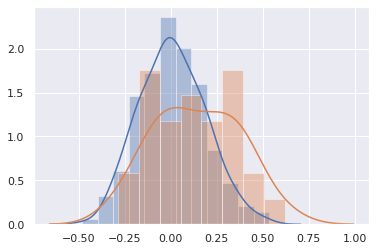

In [125]:
sns.distplot(rm1_cg, bins=12)
sns.distplot(rm1_same,bins=8)


In [91]:
raw_same = list(yield_rmso_crossgroup_corr(True,"Raw_"))
sg_same = list(yield_rmso_crossgroup_corr(True,"Sg_")) 


(1001, 'Raw_101') (1001, 'Raw_102')
(1001, 'Raw_101') (1001, 'Raw_103')
(1001, 'Raw_102') (1001, 'Raw_103')
(1004, 'Raw_110') (1004, 'Raw_111')
(1004, 'Raw_110') (1004, 'Raw_112')
(1004, 'Raw_111') (1004, 'Raw_112')
(1006, 'Raw_116') (1006, 'Raw_117')
(1006, 'Raw_116') (1006, 'Raw_118')
(1006, 'Raw_117') (1006, 'Raw_118')
(1007, 'Raw_119') (1007, 'Raw_120')
(1007, 'Raw_119') (1007, 'Raw_121')
(1007, 'Raw_120') (1007, 'Raw_121')
(1008, 'Raw_122') (1008, 'Raw_123')
(1008, 'Raw_122') (1008, 'Raw_124')
(1008, 'Raw_123') (1008, 'Raw_124')
(1009, 'Raw_125') (1009, 'Raw_126')
(1009, 'Raw_125') (1009, 'Raw_127')
(1009, 'Raw_126') (1009, 'Raw_127')
(1010, 'Raw_128') (1010, 'Raw_129')
(1010, 'Raw_128') (1010, 'Raw_130')
(1010, 'Raw_129') (1010, 'Raw_130')
(1011, 'Raw_131') (1011, 'Raw_132')
(1011, 'Raw_131') (1011, 'Raw_133')
(1011, 'Raw_132') (1011, 'Raw_133')
(1012, 'Raw_134') (1012, 'Raw_135')
(1012, 'Raw_134') (1012, 'Raw_136')
(1012, 'Raw_135') (1012, 'Raw_136')
(1013, 'Raw_137') (1013, 'Ra

Raw intra-group corr: 0.178 ± 0.18
sg intra-group corr: 0.241 ± 0.26


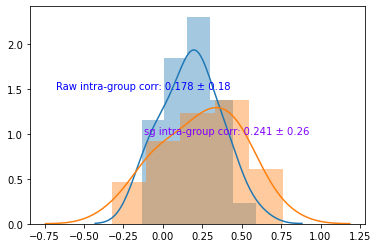

In [107]:
sns.distplot(raw_same)
sns.distplot(sg_same)

stats = lambda v: (np.array(v).mean(), np.array(v).std())
str1 = "Raw intra-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(raw_same)) 
str2 = "sg intra-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(sg_same))
plt.text(-0.68,1.5, str1,color=(0,0,1))
plt.text(-0.12,1., str2,color=(0.5,0,1))
print(str1)
print(str2)

In [13]:
import matplotlib.pyplot as plt

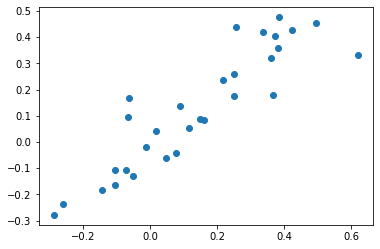

In [56]:
plt.scatter(rm1_same, rm_same)

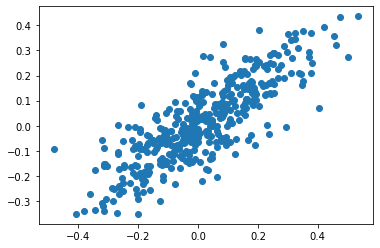

In [57]:
plt.scatter(rm1_cg, rm_cg)

In [58]:
sum((x-y)**2 for x, y in zip(rm1_cg,rm_cg))

4.1380705555347115

In [64]:
high_rmso = [(cols, corr) for (cols,corr) in yield_rmso_crossgroup_corr(same_group=True,yield_with_colnames=True) if corr > 0.4]

(1001, 'rmso_101') (1001, 'rmso_102')
(1001, 'rmso_101') (1001, 'rmso_103')
(1001, 'rmso_102') (1001, 'rmso_103')
(1004, 'rmso_110') (1004, 'rmso_111')
(1004, 'rmso_110') (1004, 'rmso_112')
(1004, 'rmso_111') (1004, 'rmso_112')
(1006, 'rmso_116') (1006, 'rmso_117')
(1006, 'rmso_116') (1006, 'rmso_118')
(1006, 'rmso_117') (1006, 'rmso_118')
(1007, 'rmso_119') (1007, 'rmso_120')
(1007, 'rmso_119') (1007, 'rmso_121')
(1007, 'rmso_120') (1007, 'rmso_121')
(1008, 'rmso_122') (1008, 'rmso_123')
(1008, 'rmso_122') (1008, 'rmso_124')
(1008, 'rmso_123') (1008, 'rmso_124')
(1009, 'rmso_125') (1009, 'rmso_126')
(1009, 'rmso_125') (1009, 'rmso_127')
(1009, 'rmso_126') (1009, 'rmso_127')
(1010, 'rmso_128') (1010, 'rmso_129')
(1010, 'rmso_128') (1010, 'rmso_130')
(1010, 'rmso_129') (1010, 'rmso_130')
(1011, 'rmso_131') (1011, 'rmso_132')
(1011, 'rmso_131') (1011, 'rmso_133')
(1011, 'rmso_132') (1011, 'rmso_133')
(1012, 'rmso_134') (1012, 'rmso_135')
(1012, 'rmso_134') (1012, 'rmso_136')
(1012, 'rmso

In [65]:
high_rmso

[(((1006, 'rmso_117'), (1006, 'rmso_118')), 0.45322578735163477),
 (((1007, 'rmso_119'), (1007, 'rmso_120')), 0.47588659107707953),
 (((1008, 'rmso_122'), (1008, 'rmso_123')), 0.41856967567476017),
 (((1008, 'rmso_123'), (1008, 'rmso_124')), 0.4395554701413167),
 (((1009, 'rmso_125'), (1009, 'rmso_126')), 0.4044593677385985),
 (((1013, 'rmso_138'), (1013, 'rmso_139')), 0.42838769944757205)]

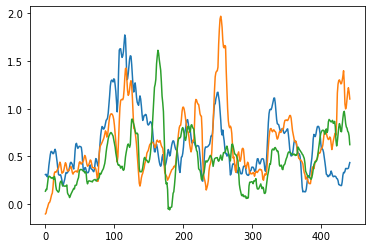

In [66]:
plt.plot(df[(1008, 'rmso_122')])
plt.plot(df[(1008, 'rmso_123')])
plt.plot(df[(1008, 'rmso_124')])

In [73]:
print(cdf.loc[(1008, 'Sg_122'),(1008, 'Sg_123')])
print(cdf.loc[(1008, 'Sg_122'),(1008, 'Sg_124')])
print(cdf.loc[(1008, 'Sg_124'),(1008, 'Sg_123')])


0.4391372153753113
0.24998971611117826
0.4039673563605483


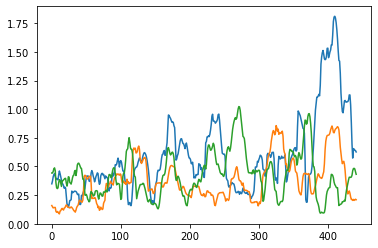

In [72]:
plt.plot(df[(1007, 'rmso_119')])
plt.plot(df[(1007, 'rmso_120')])
plt.plot(df[(1007, 'rmso_121')])

In [75]:
resid_sg = list(yield_rmso_crossgroup_corr(same_group=True,yield_with_colnames=False,col_type='resid_'))
resid_cg = list(yield_rmso_crossgroup_corr(same_group=False,yield_with_colnames=False,col_type='resid_'))

(1001, 'resid_101') (1001, 'resid_102')
(1001, 'resid_101') (1001, 'resid_103')
(1001, 'resid_102') (1001, 'resid_103')
(1004, 'resid_110') (1004, 'resid_111')
(1004, 'resid_110') (1004, 'resid_112')
(1004, 'resid_111') (1004, 'resid_112')
(1006, 'resid_116') (1006, 'resid_117')
(1006, 'resid_116') (1006, 'resid_118')
(1006, 'resid_117') (1006, 'resid_118')
(1007, 'resid_119') (1007, 'resid_120')
(1007, 'resid_119') (1007, 'resid_121')
(1007, 'resid_120') (1007, 'resid_121')
(1008, 'resid_122') (1008, 'resid_123')
(1008, 'resid_122') (1008, 'resid_124')
(1008, 'resid_123') (1008, 'resid_124')
(1009, 'resid_125') (1009, 'resid_126')
(1009, 'resid_125') (1009, 'resid_127')
(1009, 'resid_126') (1009, 'resid_127')
(1010, 'resid_128') (1010, 'resid_129')
(1010, 'resid_128') (1010, 'resid_130')
(1010, 'resid_129') (1010, 'resid_130')
(1011, 'resid_131') (1011, 'resid_132')
(1011, 'resid_131') (1011, 'resid_133')
(1011, 'resid_132') (1011, 'resid_133')
(1012, 'resid_134') (1012, 'resid_135')


In [79]:
resid_sg = np.array(resid_sg)
resid_cg = np.array(resid_cg)

Resid cross-group corr:
-0.001 ± 0.10
Resid within-group corr:
      0.079 ± 0.13


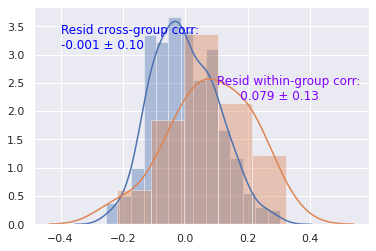

In [134]:
sns.distplot(resid_cg)

sns.distplot(resid_sg)

str1 = "Resid cross-group corr:\n{:.3f} \u00b1 {:.2f}".format(*stats(resid_cg)) 
str2 = "Resid within-group corr:\n      {:.3f} \u00b1 {:.2f}".format(*stats(resid_sg))
plt.text(-0.4,3.1, str1,color=(0,0,1))
plt.text(0.1,2.2, str2,color=(0.5,0,1))
print(str1)
print(str2)

In [145]:
from scipy.stats import ttest_ind

ttest_ind(resid_cg, resid_sg, equal_var=False)

Ttest_indResult(statistic=-3.204914548678204, pvalue=0.0030800161062341275)

In [82]:
print("same group: {:.3f} \u00b1 {:.2f}".format(resid_sg.mean(), resid_sg.std()))
print("cross group: {:.3f} \u00b1 {:.2f}".format(resid_cg.mean(), resid_cg.std()))

same group: 0.079 ± 0.13
cross group: -0.001 ± 0.10


In [85]:
high_resid = [(cols, corr) for (cols,corr) in yield_rmso_crossgroup_corr(same_group=True,yield_with_colnames=True,col_type='resid_') if corr > 0.25]

(1001, 'resid_101') (1001, 'resid_102')
(1001, 'resid_101') (1001, 'resid_103')
(1001, 'resid_102') (1001, 'resid_103')
(1004, 'resid_110') (1004, 'resid_111')
(1004, 'resid_110') (1004, 'resid_112')
(1004, 'resid_111') (1004, 'resid_112')
(1006, 'resid_116') (1006, 'resid_117')
(1006, 'resid_116') (1006, 'resid_118')
(1006, 'resid_117') (1006, 'resid_118')
(1007, 'resid_119') (1007, 'resid_120')
(1007, 'resid_119') (1007, 'resid_121')
(1007, 'resid_120') (1007, 'resid_121')
(1008, 'resid_122') (1008, 'resid_123')
(1008, 'resid_122') (1008, 'resid_124')
(1008, 'resid_123') (1008, 'resid_124')
(1009, 'resid_125') (1009, 'resid_126')
(1009, 'resid_125') (1009, 'resid_127')
(1009, 'resid_126') (1009, 'resid_127')
(1010, 'resid_128') (1010, 'resid_129')
(1010, 'resid_128') (1010, 'resid_130')
(1010, 'resid_129') (1010, 'resid_130')
(1011, 'resid_131') (1011, 'resid_132')
(1011, 'resid_131') (1011, 'resid_133')
(1011, 'resid_132') (1011, 'resid_133')
(1012, 'resid_134') (1012, 'resid_135')


In [86]:

high_resid

[(((1008, 'resid_122'), (1008, 'resid_123')), 0.3242352543373091),
 (((1010, 'resid_128'), (1010, 'resid_130')), 0.27088841061009994)]

In [140]:
print(dfc[(1008,'rmso_122')][(1008,'rmso_123')])
print(dfc[(1010,'rmso_128')][(1010,'rmso_130')])

0.41856967567476017
-0.018757837281354054


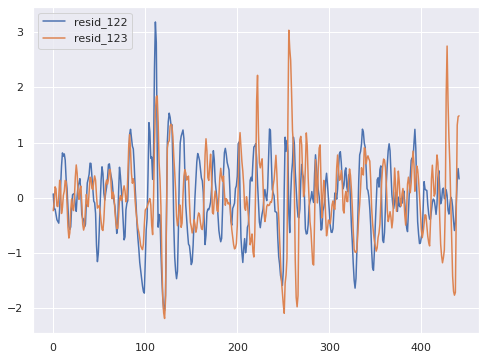

In [151]:
sns.set()
plt.figure(figsize=(8,6))
plt.plot(df[(1008, 'resid_122')])
plt.plot(df[(1008, 'resid_123')])
plt.legend(['resid_122','resid_123'])

In [159]:
from scipy.signal import savgol_filter

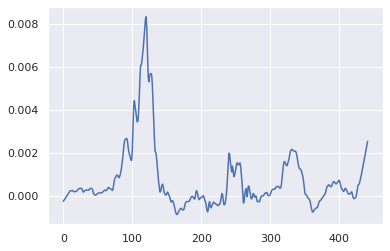

In [162]:
rz122 = zscore(df[(1008, 'resid_122')])
rz123 = zscore(df[(1008, 'resid_123')])
#(rz122*rz123).sum()/rz122.shape[0]
plt.plot(savgol_filter(rz122*rz123/rz122.shape[0],21,1))

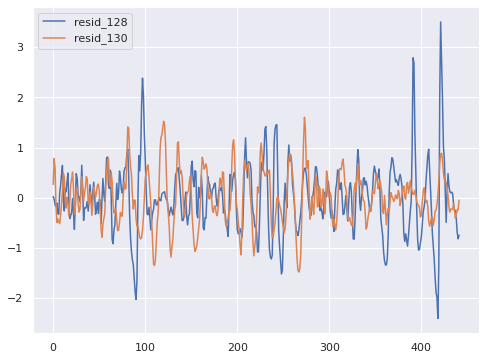

In [163]:
plt.figure(figsize=(8,6))
plt.plot(df[(1010, 'resid_128')])
plt.plot(df[(1010, 'resid_130')])
plt.legend(['resid_128','resid_130'])

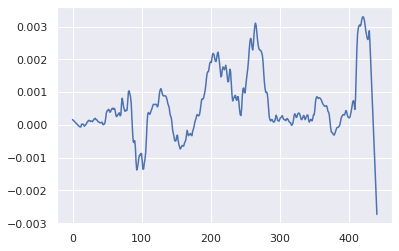

In [165]:
rz128 = zscore(df[(1010, 'resid_128')])
rz130 = zscore(df[(1010, 'resid_130')])
#(rz122*rz123).sum()/rz122.shape[0]
plt.plot(savgol_filter(rz128*rz130/rz128.shape[0],21,1))

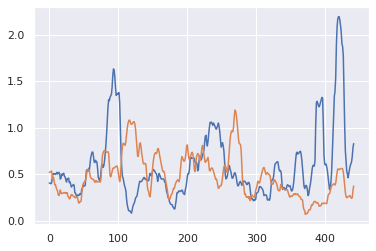

In [141]:
plt.plot(df[(1010, 'rmso_128')])
plt.plot(df[(1010, 'rmso_130')])

In [115]:
sns.set()

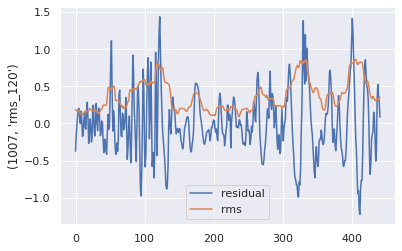

In [117]:
sns.lineplot(np.arange(len(df)), df[(1007,'resid_120')])
sns.lineplot(np.arange(len(df)), df[(1007,'rms_120')])
plt.legend(['residual','rms'])

In [ ]:
data = gdd.get_db_data()
test_pars = list(data.get_signal_by_series_type_and_interp_type([112,117],2,3))
test_pars

In [ ]:
plt.plot(test_pars[0][1][:,1])
plt.plot(test_pars[1][1][:,1])

In [ ]:
group_compts1004 = sago.group_signal_components(1004)
group_compts1006 = sago.group_signal_components(1006)

In [ ]:
plt.plot(zscore(test_pars[0][1][:,1]))
plt.plot(group_compts1004['Raw_112']+2)

plt.plot(group_compts1004['Sg_112']+group_compts1004['resid_112']+4)

plt.plot(df[(1004,'Raw_112')]+6)

In [ ]:
plt.plot(zscore(test_pars[1][1][:,1]))
plt.plot(group_compts1006['Raw_117']+2)

plt.plot(group_compts1006['Sg_117']+group_compts1006['resid_117']+4)

plt.plot(df[(1006,'Raw_117')]+6)

In [ ]:
plt.plot(zscore(test_pars[1][1][:,1]))
plt.plot(group_compts1006['rms_117']+2)

#plt.plot(group_compts1006['Sg_117']+group_compts1006['resid_117']+4)

plt.plot(df[(1006,'rms_117')]+6)

In [ ]:
np.corrcoef(df[(1006,'rms_117')], df[(1004,'rms_112')])

In [ ]:
rm_same = list(yield_rmso_crossgroup_corr(True))

In [ ]:
np.corrcoef(group_compts1004['rmso_112'],group_compts1006['rmso_117'])

In [ ]:
[len(x) for x in group_compts1004.values()]

In [ ]:
p1 = list(sca.yield_group_signals(1004,2,3))
p1

In [ ]:
dfc = df.corr()

In [ ]:
dfc.columns

In [ ]:
dfc[(1006,'rms_117')].index

In [ ]:
dfc.index